# Алиев Азнаур, Б01-909 


## ОДУ 8.11 № 5

### Методами разных порядков апроксимации численно решить систему Лоренца: 

$$
x' = -\sigma (x - y),
$$
$$
y' = -xz + rx - y,
$$
$$
z' = xy - bz,
$$
$$
x(0) = y(0) = z(0) = 1
$$
$$
b = 8/3, \sigma = 10, r = 28, 0< t \le 50.
$$

In [1]:
import math
import copy
import matplotlib.pyplot as plt
import numpy as np


from ipywidgets import interactive, fixed

In [2]:
x_0 = y_0 = z_0 = 1
b = 8 / 3
sigma = 10
r = 28
t_0 = 0
t_max = 50

h = 1e-3

In [3]:
def draw(array):
    fig = plt.figure(figsize=(10, 10), dpi=80)
    ax = fig.add_subplot(projection='3d')
    ax.plot(array[:, 0], array[:, 1], array[:, 2], label='solution')
    ax.set_xlabel("X", fontsize=12)
    ax.set_ylabel("Y", fontsize=12)
    ax.set_zlabel("Z", fontsize=12)
    plt.show()

## Воспользуются методами Рунге-Кутты 1- 4 порядков

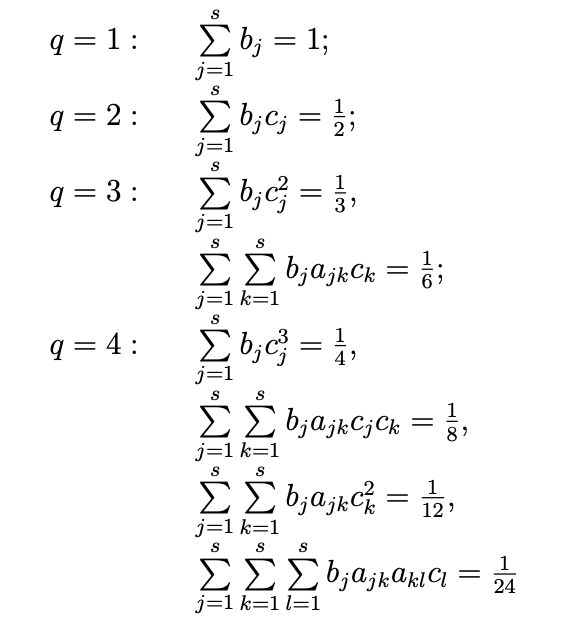

In [4]:
def lorentz(X_):
    X = copy.deepcopy(X_)
    X[0] = -sigma*(X_[0] - X_[1]) # x
    X[1] = -X_[0]*X_[2] + r*X_[0] - X_[1] # y
    X[2] = X_[0]*X_[1] - b*X_[2] # z
    return X

## Первый порядок апроксимации

In [5]:
def RungeKutta_q1(x_0=1, y_0=1, z_0=1, h=1e-3, to_draw=False):
    times = np.arange(t_0, t_max, h)
    X = np.zeros((len(times), 3))
    X[0] = np.array([x_0, y_0, z_0])
    for i in range(1, len(times) - 1):
        k_1 = lorentz(X[i - 1]) 
        k_2 = lorentz(X[i - 1]) 
        k_3 = lorentz(X[i - 1]) 
        k_4 = lorentz(X[i - 1]) 

        X[i] = X[i - 1] + h * (k_1 + k_2 + k_3 + k_4) / 4 
    
        
    if to_draw: 
        draw(X)
    else:
        return X[0:-1:10000]

In [6]:
interactive_plot = interactive(RungeKutta_q1, h = (1e-4, 1e-3, 1e-4), x_0=1, y_0=1, z_0=1, to_draw=True, continuous_update=False)
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot

interactive(children=(IntSlider(value=1, description='x_0', max=3, min=-1), IntSlider(value=1, description='y_…

## Второй порядок апроксимации

In [7]:
def RungeKutta_q2(x_0=1, y_0=1, z_0=1, h=1e-3, to_draw=False):
    times = np.arange(t_0, t_max, h)
    X = np.zeros((len(times), 3))
    X[0] = np.array([x_0, y_0, z_0])
    for i in range(1, len(times) - 1):
        k_1 = lorentz(X[i - 1]) 
        k_2 = lorentz(X[i - 1] + h * k_1 * 3 / 4) 
        k_3 = lorentz(X[i - 1]) 
        k_4 = lorentz(X[i - 1] + h * k_3 * 3 / 4) 
   
        X[i] = X[i - 1] + h * (k_1 + 2*k_2 + 2*k_3 + k_4)  / 6
    
        
    if to_draw: 
        draw(X)
    else:
        return X[0:-1:10000]

In [8]:
interactive_plot = interactive(RungeKutta_q2, h = (1e-4, 1e-3, 1e-4), x_0=1, y_0=1, z_0=1, to_draw=True, continuous_update=False)
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot

interactive(children=(IntSlider(value=1, description='x_0', max=3, min=-1), IntSlider(value=1, description='y_…

## Третий порядок апроксимации

In [9]:
def RungeKutta_q3(x_0=1, y_0=1, z_0=1, h=1e-3, to_draw=False):
    times = np.arange(t_0, t_max, h)
    X = np.zeros((len(times), 3))
    X[0] = np.array([x_0, y_0, z_0])
    for i in range(1, len(times) - 1):
        k_1 = lorentz(X[i - 1]) 
        k_2 = lorentz(X[i - 1] + h * k_1 * 1 / 2) 
        k_3 = lorentz(X[i - 1] + h * k_2 * 1) 
        k_4 = lorentz(X[i - 1]) 
        for j in range(X.shape[-1]): 
            X[i] = X[i - 1] + h * (k_1 + 4 * k_2 + k_3) / 6 
    
        
    if to_draw: 
        draw(X)
    else:
        return X[0:-1:10000]

In [10]:
interactive_plot = interactive(RungeKutta_q3, h = (1e-4, 1e-3, 1e-4), x_0=1, y_0=1, z_0=1, to_draw=True, continuous_update=False)
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot

interactive(children=(IntSlider(value=1, description='x_0', max=3, min=-1), IntSlider(value=1, description='y_…

## Четвертый порядок апроксимации

In [11]:
def RungeKutta_q4(x_0=1, y_0=1, z_0=1, h=1e-3, to_draw=False):
    times = np.arange(t_0, t_max, h)
    X = np.zeros((len(times), 3))
    X[0] = np.array([x_0, y_0, z_0])
    for i in range(1, len(times) - 1):
        k_1 = lorentz(X[i - 1]) 
        k_2 = lorentz(X[i - 1] + h * k_1/2) 
        k_3 = lorentz(X[i - 1] + h * k_2/2)
        k_4 = lorentz(X[i - 1] + h * k_3) 
        for j in range(X.shape[-1]): 
            X[i] = X[i - 1] + h * (k_1 + 2 * (k_2 + k_3) + k_4) / 6 
    
    if to_draw: 
        draw(X)
    else:
        return X[0:-1:10000]

In [12]:
interactive_plot = interactive(RungeKutta_q4, h = (1e-4, 1e-3, 1e-4), x_0=1, y_0=1, z_0=1, to_draw=True, continuous_update=False)
output = interactive_plot.children[-1]
output.layout.height = '700px'
interactive_plot

interactive(children=(IntSlider(value=1, description='x_0', max=3, min=-1), IntSlider(value=1, description='y_…

# Визуализция рещений похоже на аттрактор Лоренца

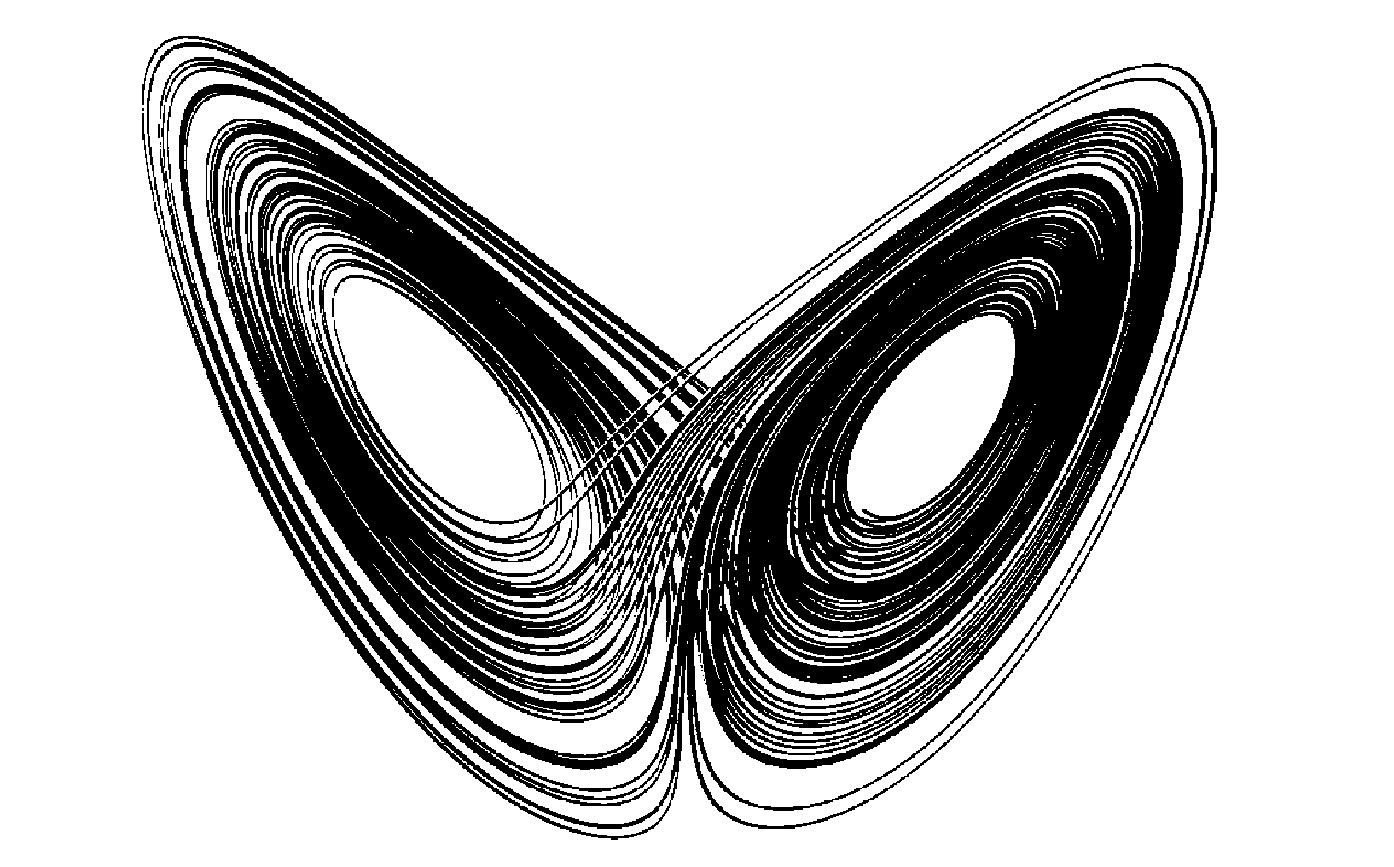

# Вывод отсчета с шагом 10000  для разных апрокимаций

In [13]:
RungeKutta_q1() 

array([[ 1.        ,  1.        ,  1.        ],
       [-4.39795654, -3.8409108 , 23.22485342],
       [10.61098536,  5.87720861, 34.48052002],
       [ 2.71385181,  3.52290383, 17.85118671],
       [-3.46509143, -6.40798925,  9.94804136]])

In [14]:
RungeKutta_q2() 

array([[  1.        ,   1.        ,   1.        ],
       [ -4.73519309,  -3.60959829,  24.48054162],
       [ -7.27951749, -11.49913983,  17.78809102],
       [-13.93530114, -18.16541521,  29.44852118],
       [  3.20109481,  -3.2086704 ,  29.86816045]])

In [15]:
RungeKutta_q3() 

array([[  1.        ,   1.        ,   1.        ],
       [ -4.90170063,  -3.74442341,  24.68758171],
       [ 13.21469706,  12.76998305,  33.69231324],
       [-14.097204  , -10.2093524 ,  38.07466175],
       [ 11.35260631,  15.46549681,  25.27652088]])

In [16]:
RungeKutta_q4() 

array([[ 1.        ,  1.        ,  1.        ],
       [-4.90268755, -3.74387294, 24.69085811],
       [13.79322909, 12.95184711, 34.90163699],
       [ 6.68530254,  1.31614243, 31.17183781],
       [ 5.22737948,  1.68845318, 28.09041837]])

## На последних отсчетах значения методов сильно отличаются